
#---------------------------------------------------------------
Check for Mising Value or NaN Value in the Dataset
#---------------------------------------------------------------

Count Number of Missing Value on Each Column: 
Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

Total Features with missing Values = 5
        Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0           1 2010-05-02        42.31       2.572  211.096358         8.106   
1           1 2010-12-02        38.51       2.548  211.242170         8.106   
2           1 2010-02-19        39.93       2.514  211.289143         8.106   
3           1 2010-02-26        4

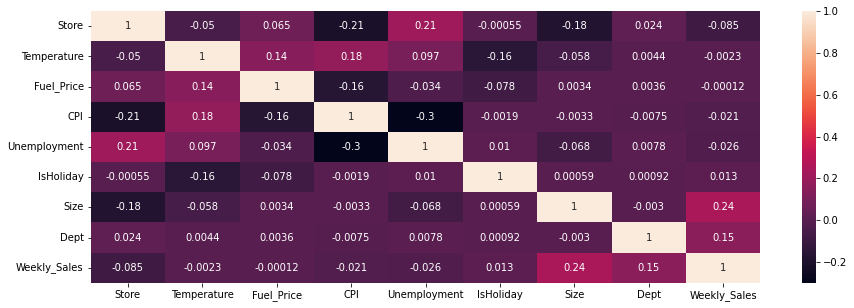

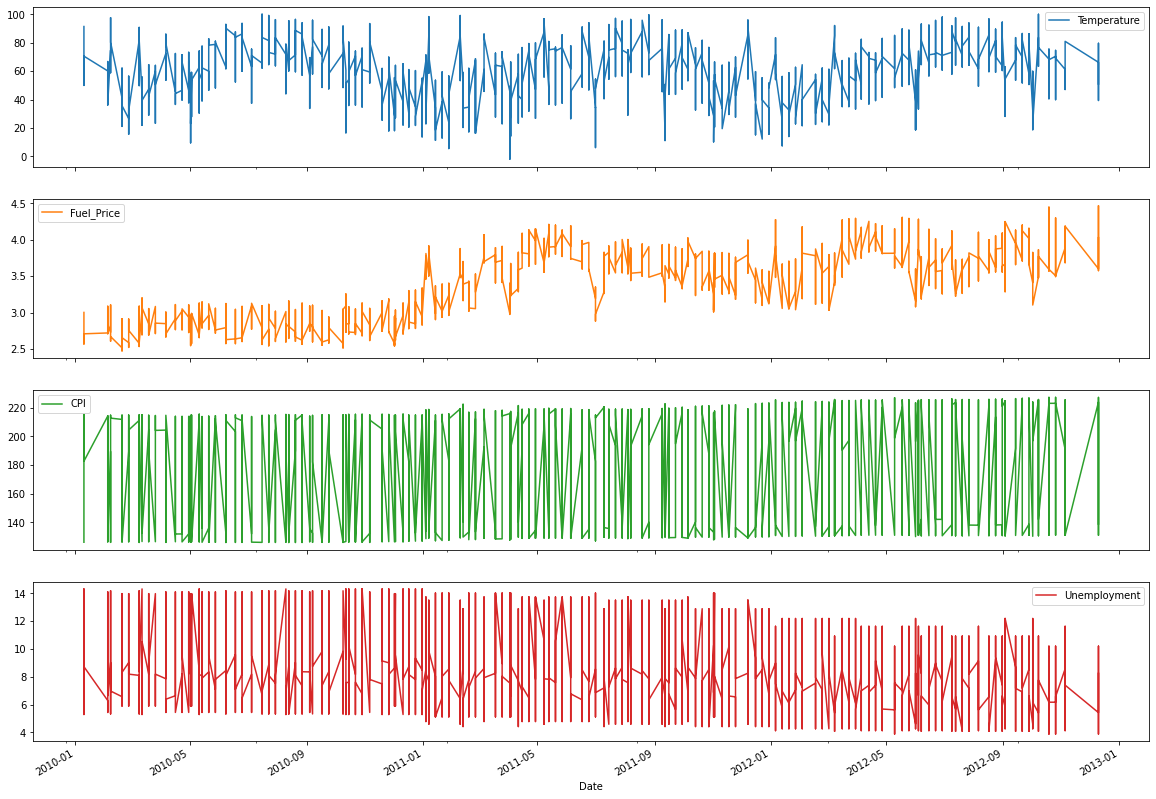

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

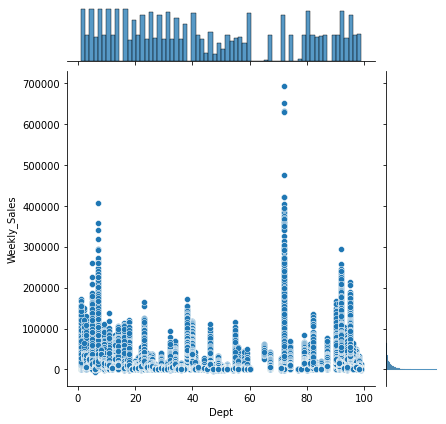

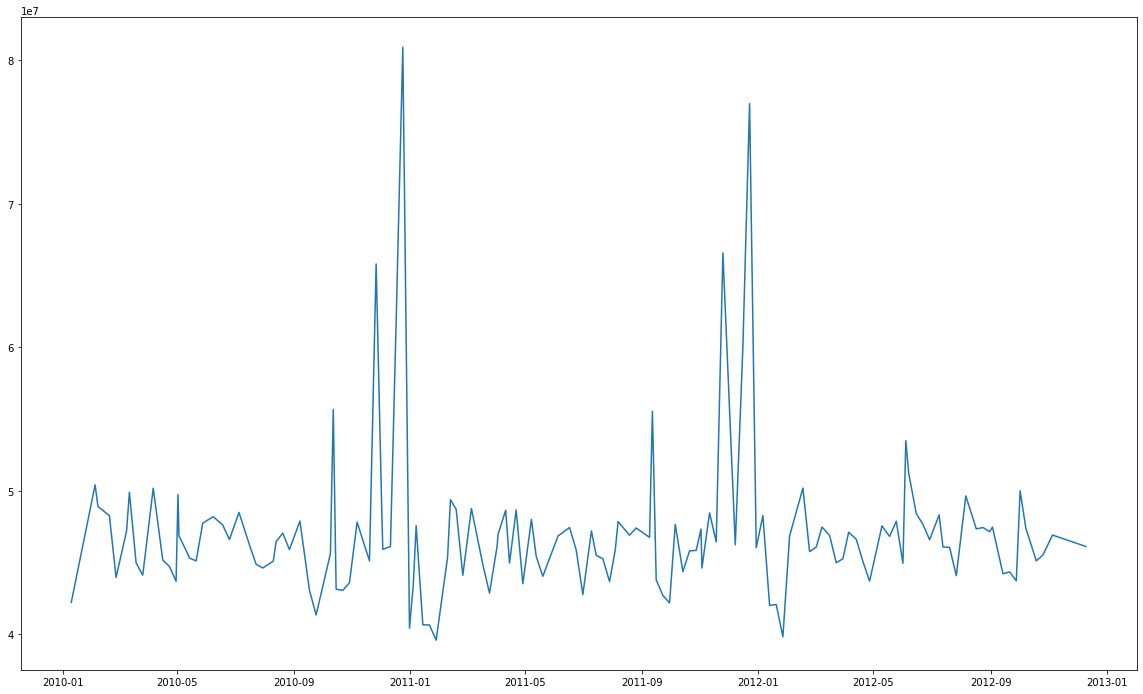

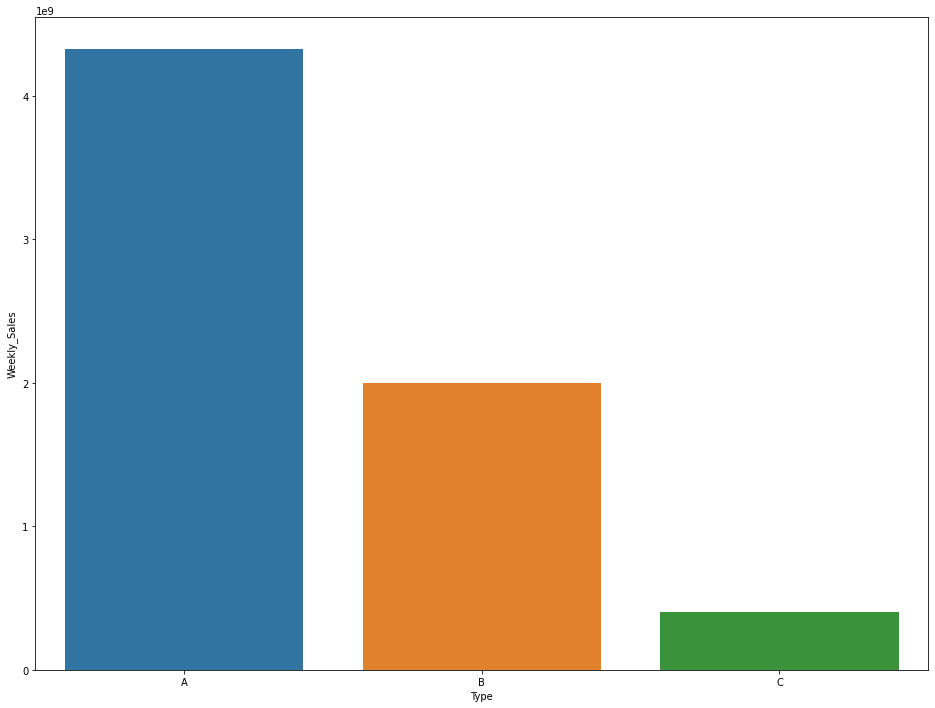

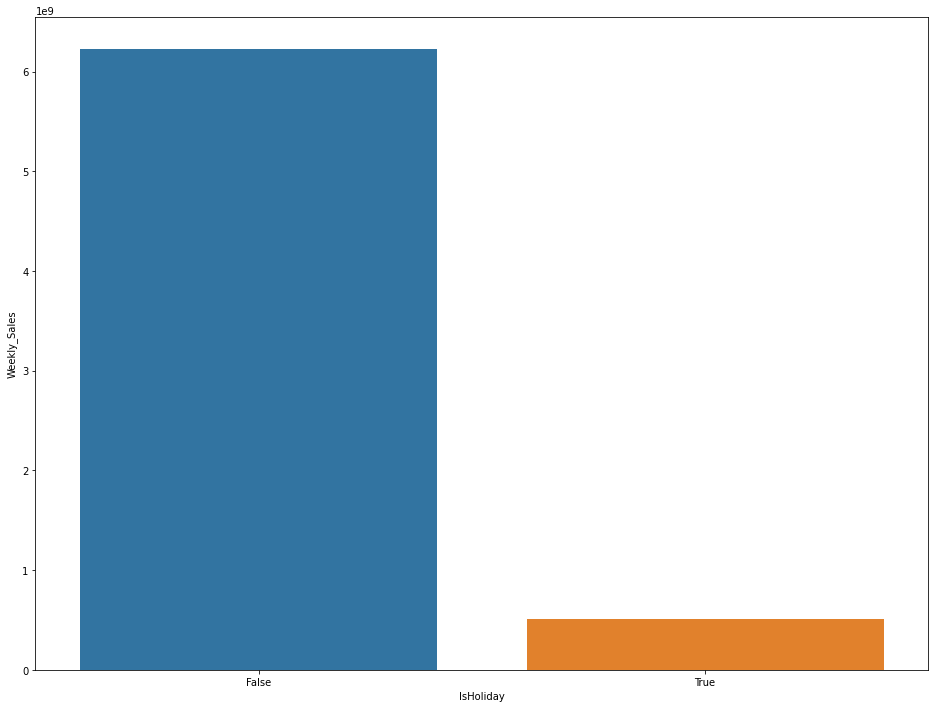

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
import warnings
warnings.filterwarnings("ignore")  
%matplotlib inline

#load data 
try:
    features_data = pd.read_csv("Features data set.csv")
    sales_data = pd.read_csv("sales data-set.csv")
    stores_data = pd.read_csv("stores data-set.csv")

except:
    features_data = pd.read_excel("Features data set.xlsx")
    sales_data = pd.read_excel("sales data-set.xlsx")
    stores_data = pd.read_excel("stores data-set.xlsx")
# merge all data in one file
dataset = pd.merge(features_data, stores_data, on = ['Store'], how='right')
dataset = pd.merge(dataset, sales_data, on = ['Date','Store','IsHoliday'], how='right')


if dataset['Date'].dtypes == 'object':
    dataset['Date'] = pd.to_datetime(dataset['Date'])

print()
print('#---------------------------------------------------------------')
print('Check for Mising Value or NaN Value in the Dataset')
print('#---------------------------------------------------------------')
# Method - 1
# Count Number of Missing Value on Each Column    
print('\nCount Number of Missing Value on Each Column: ')        
print(dataset.isnull().sum(axis=0))
    
# Count Number of Missing Value on Each Row    
#print('\nCount Number of Missing Value on Each Row: ')        
#print(dataset.isnull().sum(axis=0))

# Method - 2
# Check if there are any missing values in Dataset
feature_count = dataset.columns[dataset.isnull().sum() != 0].size
print()
print("Total Features with missing Values = " + str(feature_count))

# Method - 3
# Drop all missing value.
dataset = dataset.drop(dataset.columns[dataset.isnull().sum() != 0], axis = 1,inplace = False)
print(dataset)
plt.figure(1, figsize=(15,5))
sns.heatmap(dataset.corr(), annot=True)

dataset[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

sns.jointplot(x='Dept',y='Weekly_Sales',data=dataset)

df = dataset.groupby('Date').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.plot('Date', 'Weekly_Sales', data=df)

df= dataset.groupby('Type').sum()['Weekly_Sales'].reset_index()
plt.figure(figsize = (16, 12))
sns.barplot(x=df['Type'],y=df['Weekly_Sales'])

df= dataset.groupby('IsHoliday').sum()['Weekly_Sales'].reset_index()
plt.figure(figsize = (16, 12))
sns.barplot(x=df['IsHoliday'],y=df['Weekly_Sales'])

